#sinusoidal을 만들어내는 것이 phasor(ex. sin, cosin function)

#e^세타i = cos(세타) + sin(세타)i: 오일러공식

#f(세타) = e^세타i = a+bi = 오일러공식의 output
#세타의 값에 따라 변함(세타, 값) = (0, 1), (파이/2, i), (파이, -1), (3파이/2, -i)
#이 때, a는 x축, b는 y축으로 한다면 (1, 0), (0, 1), (-1, 0), (0, -1)의 좌표로 나타남
#좌표값들은 벡터값이다.

#시간의 개념이 정확히 정의가 되어있지 않으면 소리의 높이를 조절할 수 없다.
#각도와 초 개념 모두 넣어줘야 진정한 소리가 나온다.
#즉, 소리라는 실체는 그 속에 꼭 시간의 개념이 들어있어야 한다. 
#그래서, sin(세타)라고만 하면 소리를 만들 수 없다. 

In [2]:
from matplotlib import pyplot as plt #다른 표현으로 바꿔쓰기(시험)
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter #그 외 표현들은 copy해서 쓰기

[phasor]

In [3]:

#praat의 puretone 만드는 과정
amp = 1 
sr = 10000 #음질의 해상도를 의미, 1초에 총 10000개를 가지고 표현
dur = 0.5
freq = 100.0

t = 0.0001 0.0002 0.0003 ... 0.5000 
sampling rate와 duration만 있으면 만들 수 있다.

In [4]:
theta = np.arange(0, 2*np.pi, 0.1) #10pi로 설정할 경우 5번의 주기가 생긴다. 
theta

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2])

In [5]:
s = np.sin(theta) #np붙이는 것 확인 
s

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ])

<IPython.core.display.Javascript object>


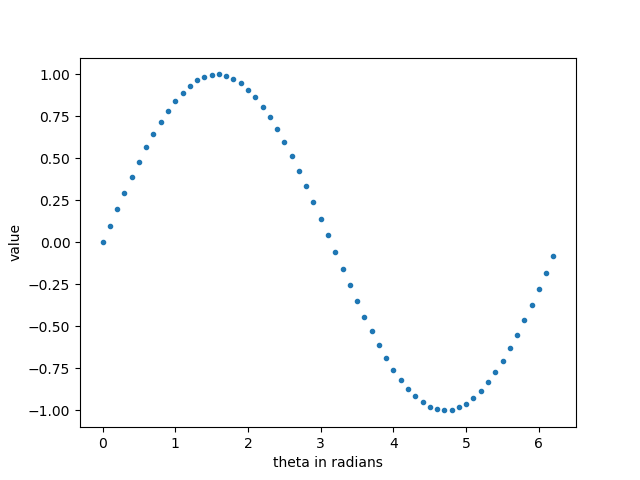

Text(0, 0.5, 'value')

In [6]:
fig = plt.figure() #figure는 전체 
ax = fig.add_subplot(111) #1행 1열로 화면분리를 하는데 그 중 1번째를 선택
ax.plot(theta, s, '.') #theta는 0부터 2pi, s는 sin function의 output / ,이 아닌 -의 형태로 설정할 수도 있음.
#점들의 배열을 보고 sin함수임을 알 수 있다. 
ax.set_xlabel('theta in radians') #간격이 동일 
ax.set_ylabel('value') #y축의 경우 linear의 형태일 때 동일(cf.non-linear) 
#소리는 시간이 있어야 하는데 본 그래프이 경우 시간이 없기에 소리가 될 수 없다. 

[시간을 만드는 경우]

In [7]:
#generate time(중요)
t = np.arange(1, sr * dur+1)/sr #1/10000초부터 5000/10000초까지
#sr만큼의 time, sr로 나눠주기 전에는 단지 인덱스를 준 상황이므로 시간이 되지는 않는다. 

In [8]:
t

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
       5.000e-01])

In [9]:
#generate phase(중요), 각도값을 의미, time과 연동시켜서 처리 
theta = t * 2*np.pi * freq #np.pi는 상수값, 파이를 의미  
#freq 없이 만약 t가 1이라면, 1초동안 한바퀴 도는 형태를 만들어라.
#2파이가 1초 동안 총 몇개가 있어야 되는지를 의미 
#이전의 형태와 달리 시간의 개념이 입혀졌기 때문에 임의적으로 나눠지지 않음. 

time과 phase의 벡터 size는 같다.

In [10]:
#generate signal by cosine-phasor
s = np.sin(theta)

<IPython.core.display.Javascript object>


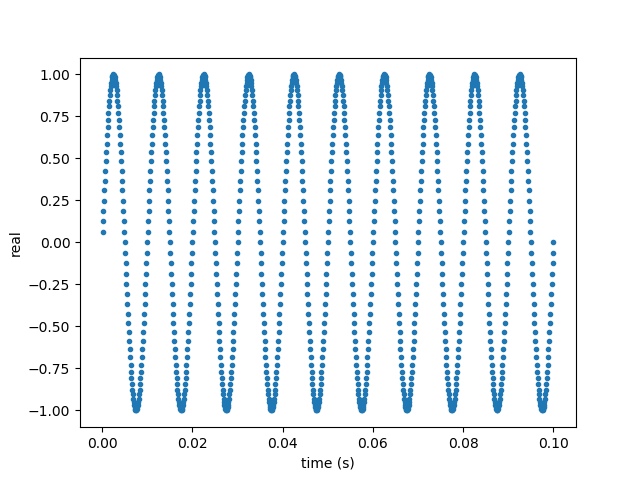

Text(0, 0.5, 'real')

In [11]:
#그림을 그릴 준비 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.') #점들의 개수는 총 1000개 
ax.set_xlabel('time (s)') #2차원의 형태, 숫자가 2개있기에 2차원벡터 
ax.set_ylabel('real')

In [36]:
#generate signal by complex-phasor
c = np.exp(theta*1j) #1j는 i와 같음. 
c

array([0.99802673+6.27905195e-02j, 0.9921147 +1.25333234e-01j,
       0.98228725+1.87381315e-01j, ..., 0.9921147 -1.25333234e-01j,
       0.99802673-6.27905195e-02j, 1.        +1.96438672e-15j])

<IPython.core.display.Javascript object>


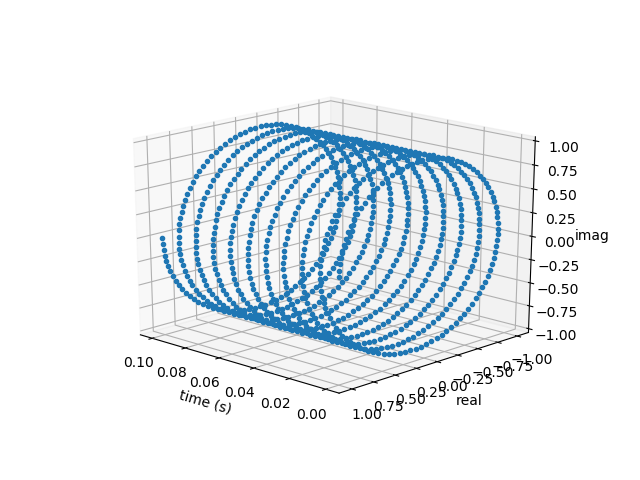

Text(0.5, 0, 'imag')

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.') #숫자가 3개있기에 3차원벡터
ax.set_xlabel('time (s)') #총 1000개의 점이 찍힘. 
ax.set_ylabel('real')
ax.set_zlabel('imag')
#c의 값중에서 real은 앞의 값들만 imag는 뒤의 값들만 받아온다.
#ex) c.real = 0.99802673 / c.imag = 6.27905195e-02j

In [38]:
ipd.Audio(s, rate=sr) #import를 하지 않으면 쓸 수 없음. 
#s대신 다른 값을 쓰더라도 가능 